# Beta Bank Case: Will The Existing Client Withdraw the Contracts for Bank Services?

## Project Description

The clients of "Beta Bank" (name of the bank is changed for confidential purposes) started to stop using the bank services. The bank top management worries about that. Beta Bank's marketing specialists believe that to save current clients is cheaper in terms of costs then to attrace new ones.

### TASK 
The task for the project is to predict whether existing Beta Bank's clients are going to stop using the bank services in upcoming future. 

### DATA
There is an archived data given, including the data about contracts withdrawal by the current clients.

### METHODOLOGY
- **To build a machine learning model with a maximun F1-score (at least F1-score = 0.59). The model is to be tested on the test data.**
- **To measure AUC-ROC score and compare it with F1-score.**

## Variables Description

**Features**

- RowNumber - index in the data rows

- CustomerId

- Surname

- CreditScore — cridit history, client's credit raiting

- Geography — страна проживания

- Gender

- Age

- Tenure — number of years for how long the client was staying with the bank

- Balance — current account's balance

- NumOfProducts

- HasCrCard — binary valriables: Does a client have a credit card?

- IsActiveMember - binary valriables: Is a client actively using the bank for transactions?

- EstimatedSalary



**Target**

•	_**Exited**_ — the fact the the client has withdrawn the contract

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import fbeta_score, make_scorer, classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

## 1 - Data Pre-processing

In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport

In [6]:
data = pd.read_csv('/Users/yuliabezginova/Documents/DS/praktikum/project-6_ML_banking/Churn.csv')

print(data.shape)
print(data.head(5))

(10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Having a brief look on the data quality via histograms:

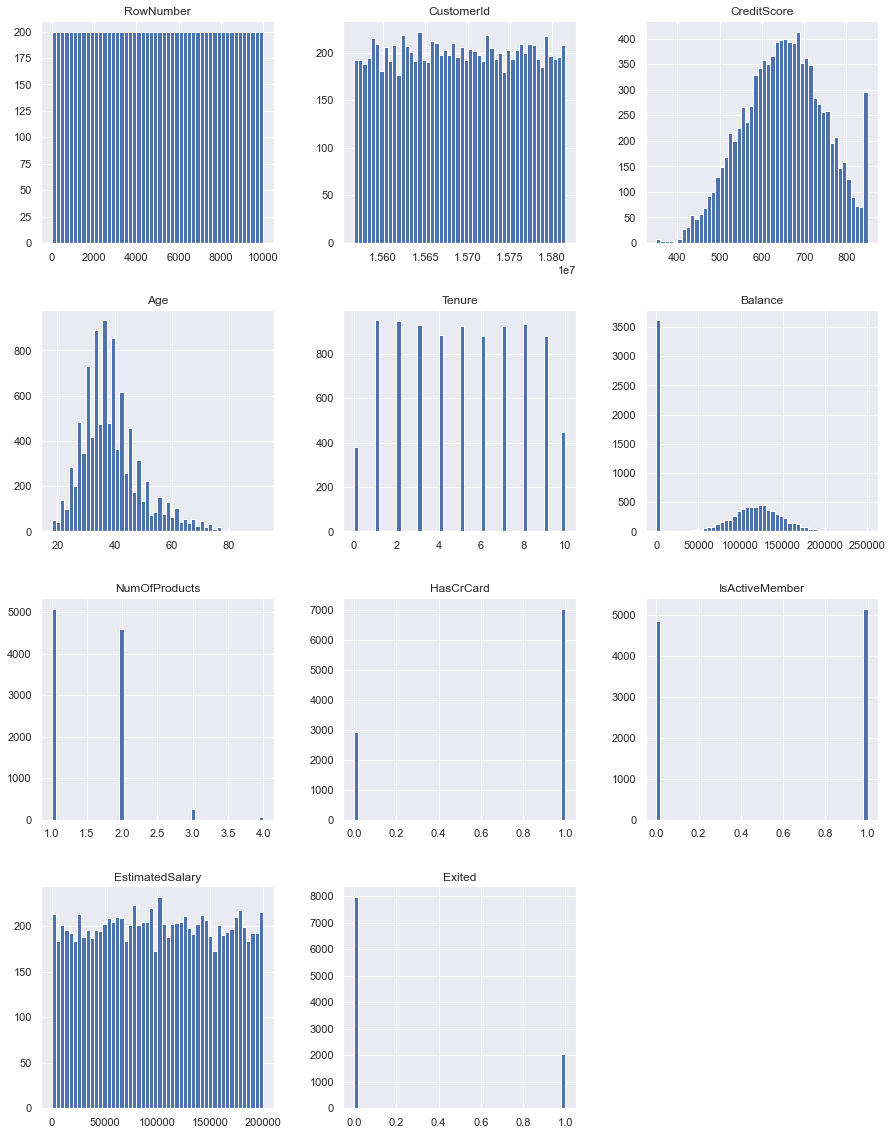

In [8]:
data.hist(bins=50, figsize=(15, 20));
None

Checking the datasets for missing values:

**Explorative Data Analysis (EDA) with Pandas Profiling.**

In [13]:
report = ProfileReport(data)

In [11]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Column _Tenure_ contains missings.

In [15]:
data['Tenure'] = data['Tenure'].fillna(data.groupby('Balance')['Tenure'].transform('median'))
data['Tenure'].isna().sum() / len(data)

0.0575

**As long as the share of missings is 5.75%, we can safely remove them from the dataset. Another option to deal with missings is to fill them with random values since there are no clear reasons why those missings occur.**

In [16]:
data = data.dropna(subset=['Tenure'])

In [17]:
data['Tenure'].isna().sum()

0

Missings from the column _Tenure_ is removed. **Final check for missing values:**

In [18]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

Data is ready for further analysis.

## 2 - Checking target classes disbalance. Training the model without taking into account target classes disbalance.


## 3 - Improving the model quality by taking into account target classes disbalance, choosing the best trained model.


## 4 - Final testing of the machine learning model